In [30]:
# Approach to generate the linear trajectory to every trajectory recived from fiji to then compre
# them by some metrics:

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [2]:
# Creating the sample data frame randomly generated
df_random = pd.DataFrame(columns=['Track_name','start_x', 'start_y', 'end_x', 'end_y', 'Move_frames'])

In [3]:
# Generating 10 random positions for start and end points:
track_names = [f'track_{i}' for i in range(1,21)]
df_random['Track_name'] = track_names
df_random['Move_frames'] = random.sample(range(5,100), 20)

col_list = ['start_x', 'start_y', 'end_x', 'end_y']
for col in col_list:
    df_random[col] = random.sample(range(0,40), 20)
    
df_random

,Track_name,start_x,start_y,end_x,end_y,Move_frames
0,track_1,7,26,27,28,46
1,track_2,12,7,18,21,50
2,track_3,18,11,3,7,54
3,track_4,6,30,13,26,98
4,track_5,22,37,5,27,87
5,track_6,5,23,21,37,14
6,track_7,32,27,26,12,94
7,track_8,39,8,32,31,42
8,track_9,4,21,38,18,17
9,track_10,24,28,22,17,23


In [4]:
# function to generating random intigers for the pos_x and y in every move frame
def generate_random_integers(n):
    return np.random.randint(1, 50, size = (n, 2))

# creating a new data frame with equal number of rows based on the 'number' column
df_move_frames = pd.DataFrame(np.repeat(df_random.values, df_random['Move_frames'], axis = 0),
                              columns=df_random.columns)

# Generating random integers for each pos_x, pos_y in each row:
df_move_frames[['pos_x', 'pos_y']] = pd.DataFrame(generate_random_integers(len(df_move_frames)))



In [5]:
df_move_frames

,Track_name,start_x,start_y,end_x,end_y,Move_frames,pos_x,pos_y
0,track_1,7,26,27,28,46,41,3
1,track_1,7,26,27,28,46,16,28
2,track_1,7,26,27,28,46,47,27
3,track_1,7,26,27,28,46,25,18
4,track_1,7,26,27,28,46,44,42
...,...,...,...,...,...,...,...,...
1051,track_20,3,32,24,3,26,23,49
1052,track_20,3,32,24,3,26,44,18
1053,track_20,3,32,24,3,26,10,29
1054,track_20,3,32,24,3,26,7,20


In [28]:
# Generating straight line points throught the Bresenham's algorithm

def get_intermidiate_points(A, B, steps):
    x1, y1 = A
    x2, y2 = B
    
    dx = abs(x2 - x1)
    dy = abs(y2 - y1)
    sx = 1 if x1 < x2 else -1
    sy = 1 if y1 < y2 else -1
    err = dx - dy
    
    # Saving points in line as the list of tuples:
    points = [(x1, y1)]
    
    # Itearting to the end point:
    for i in range(steps-1):
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x1 += sx
        if e2 < dx:
            err += dx
            y1 += sy
        points.append((x1, y1))
        
    return points

In [31]:
# Also lets add straight amtmematical approach to getting sample from line:
# where we give th coordinates, and number of samples we get so if the movement was
# 40 frames we get 40 samples becasue we know the start and end points we need 38 more beetwen knowns
# points
def get_points_on_line(x_A, y_A, x_B, y_B, n_samples):
    # Calcualting distance between those points:
    distance = math.sqrt((x_B - x_A)**2 + (y_B - y_A)**2)
    
    step = (x_B - x_A) / (n_samples-1)
    
    # Calcualting the slope of the line and the b y-intercept
    m = (y_B - y_A) / (x_B - x_A)
    b = y_A - m * x_A
    
    # Setting the points list:
    points = []
    
    x = x_A
    
    while x <= x_B:
        y = m * x + b
        points.append((x, y))
        x += step
        
    return points

In [32]:
# From the Bersenham's algorithm:
random_points = get_intermidiate_points((0,0), (90,150), 170)
random_points

# From the straight amthematical approach:
random_points_math = get_points_on_line(0,0, 90,150, 170)
random_points_math

[(0, 0.0),
 (0.5325443786982249, 0.8875739644970415),
 (1.0650887573964498, 1.775147928994083),
 (1.5976331360946747, 2.6627218934911245),
 (2.1301775147928996, 3.550295857988166),
 (2.6627218934911245, 4.437869822485208),
 (3.1952662721893494, 5.325443786982249),
 (3.7278106508875744, 6.213017751479291),
 (4.260355029585799, 7.100591715976332),
 (4.792899408284024, 7.988165680473373),
 (5.325443786982248, 8.875739644970414),
 (5.857988165680473, 9.763313609467454),
 (6.390532544378697, 10.650887573964496),
 (6.923076923076922, 11.538461538461537),
 (7.455621301775146, 12.426035502958577),
 (7.9881656804733705, 13.313609467455619),
 (8.520710059171595, 14.201183431952659),
 (9.05325443786982, 15.088757396449699),
 (9.585798816568044, 15.976331360946741),
 (10.118343195266268, 16.86390532544378),
 (10.650887573964493, 17.75147928994082),
 (11.183431952662717, 18.63905325443786),
 (11.715976331360942, 19.526627218934905),
 (12.248520710059166, 20.414201183431945),
 (12.78106508875739, 21

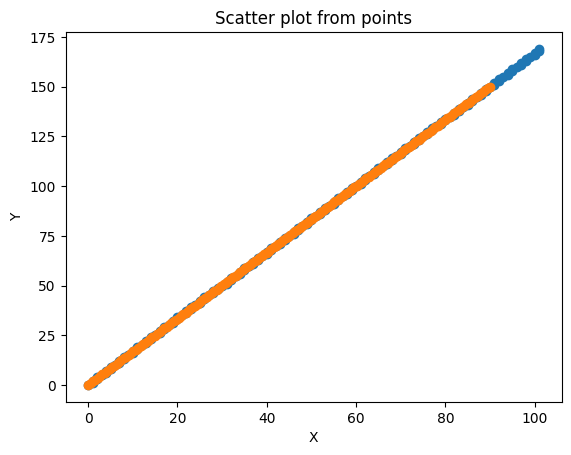

In [33]:
# Chcecking the performance of the algorithm:

# Unpacking the tuples into the separete x and y:
# first list:
x_values, y_values = zip(*random_points)
# second list:
x_2, y_2 = zip(*random_points_math)

# Creating scatterplot:
plt.scatter(x_values, y_values, label = 'Algoritm')
plt.scatter(x_2, y_2, label = 'Math_approach')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot from points')

# displaying:
plt.show()

In [27]:
# Added option to try to generate the new point in straight line acording to the previous data frame:
# creating a new data frame with equal number of rows based on the 'number' column
df_move_frames_straight_line = pd.DataFrame(np.repeat(df_random.values, df_random['Move_frames'], axis = 0),
                              columns=df_random.columns)

# Generating random integers for each pos_x, pos_y in each row:
#df_move_frames_straight_line[['pos_x', 'pos_y']] = pd.DataFrame(get_intermidiate_points((df_move_frames['start_x'], df_move_frames['start_y']),
#                                                                                        (df_move_frames['end_x'], df_move_frames['end_y'])
#                                                                                        ,len(df_move_frames)))



ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().